# Hellinger Distance

In [ ]:
import pandas as pd
import Features.backbone.VISUAL as viz

rep_file = pd.read_csv('Features/GalaxyZoo_Main_Features.csv')
names = rep_file["Image Name"]
names = list(names)
#names = [name[0:-4] for name in names]

rep_file

rep = []
# Insert the representations
for image in range(len(names)):
    rep_0 = []
    for feature in range(512):
        rep_0.append(rep_file["Feature: "+str(feature)][image])
    rep.append(rep_0)

pca = viz.pca(data = rep,n_components = min([1000,len(rep[1])]), variance = 0.95)

In [24]:
from sklearn.mixture import BayesianGaussianMixture
import time
time_stamp = time.time()

g_labels = BayesianGaussianMixture(n_components=20,
                                   n_init = 1,
                                   weight_concentration_prior=0.5,
                                   verbose = 2,
                                   max_iter = 10,
                                   random_state = 42
                                  ).fit(pca)

time2 = time.time()
print(time2-time_stamp)

Initialization 0
  Iteration 10	 time lapse 51.07358s	 ll change 17121.60636
Initialization converged: False	 time lapse 51.07393s	 ll 721425.91129
Initialization 1



KeyboardInterrupt



In [54]:
import numpy as np
from sklearn.mixture import GaussianMixture

def hellinger_distance(mu1, cov1, mu2, cov2):
    # Compute the mean and covariance matrix for the combined distribution
    mu = (mu1 - mu2)
    

    hellinger_dist_2 = 1 - (np.sqrt(np.sqrt(np.linalg.det(cov1)*np.linalg.det(cov2))
            /np.linalg.det(cov1/2+cov2/2))
    ) *np.exp((-1/8)*np.transpose(mu).dot(np.linalg.inv(cov1/2 +cov2/2).dot(mu)))
    
    return np.sqrt(hellinger_dist_2)

In [55]:
gmm = "GaussianMixture.plk"

with open (gmm,'rb') as file:
    gmm = pickle.load(file)

print(gmm)


means = gmm.means_
covariances = gmm.covariances_
n_components = 20

# Calculate Hellinger distance matrix
n_components = len(means)
hellinger_matrix = np.zeros((n_components, n_components))
for i in range(n_components):
    for j in range(i+1, n_components):
        hellinger_matrix[i, j] = hellinger_distance(means[i], covariances[i], 
                                                    means[j], covariances[j])
        hellinger_matrix[j, i] = hellinger_matrix[i, j]

# Display Hellinger distance matrix
print("Hellinger Distance Matrix:")
print(hellinger_matrix)

BayesianGaussianMixture(max_iter=1000, n_components=20, n_init=10,
                        random_state=42, verbose=2,
                        weight_concentration_prior=0.5)
Hellinger Distance Matrix:
[[0.         0.99986773 1.         1.         1.         1.
  1.         1.         1.         0.99971864 0.9999435  1.
  0.99929295 1.         1.         0.99891609 0.99999998 0.99999999
  0.99999986 0.99999999]
 [0.99986773 0.         0.99986277 1.         0.99999999 1.
  0.99974527 1.         1.         0.9999584  0.9995942  1.
  0.99967704 1.         1.         0.9990568  0.99999995 0.9999006
  0.99974824 0.99993784]
 [1.         0.99986277 0.         1.         0.99999632 1.
  0.9997024  1.         1.         0.99999975 0.99987327 0.99998364
  0.99999999 0.99999998 1.         0.9999994  0.99993324 0.99990878
  0.99991911 0.99999995]
 [1.         1.         1.         0.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.      

In [ ]:
heliinger = "Hellinger.plk"

with open (heliinger,'rb') as file:
    hellinger = pickle.load(file)

print(hellinger)

In [ ]:
predictions = gmm.predict(pca)

In [66]:

from sklearn.metrics.cluster import rand_score
rand_score(predictions, rep_file["GaussianMixture"])

0.8830459792765807

In [ ]:
umap_ =viz.umap(PCA,name ="Random Galaxy Zoo Subset", min_dist = 0.1, alpha = 0.005) #min_dist = 0.1 for hand sign data

Plotting


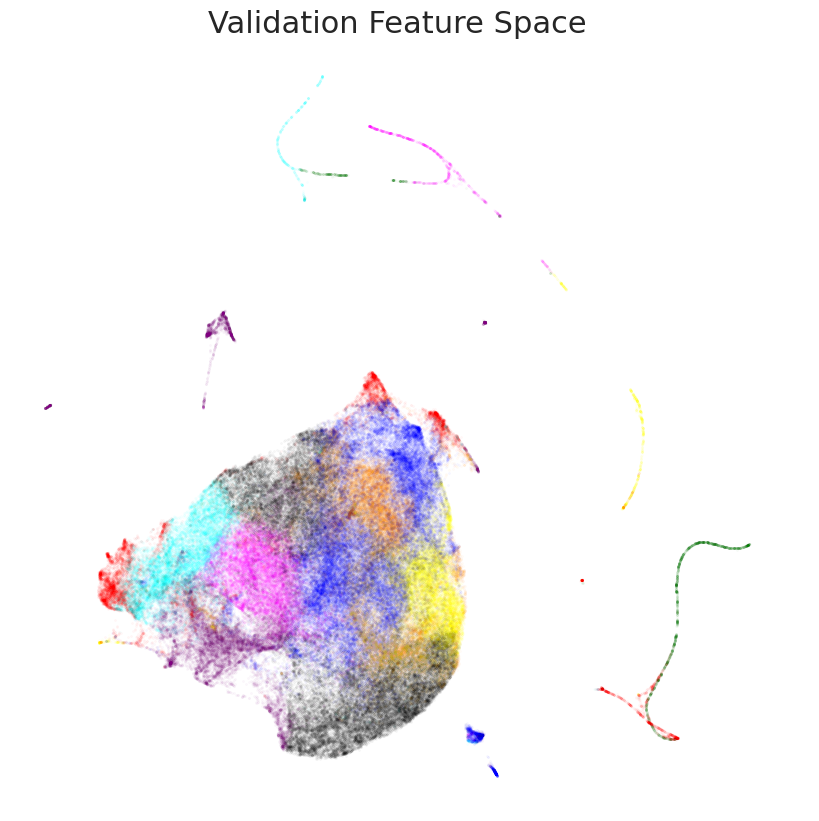

In [61]:
viz.shade(umap_,predictions,numof_class = int(max(predictions))+1,save = True,alpha = alpha,name = "Validation Feature Space",label = True,gz = True, hard_coloring = True,limits = None)#[-6,7,-5,8])#["Boring","Normal","Plumes","S_shaped","Unknown"] )